# 03: Ordinary Differential Equations in SciML

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/03-pinn-ode/03-pinn-ode-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/03-pinn-ode/03-pinn-ode.ipynb)

In [1]:
!pip install tqdm --quiet

## What is an ODE?

An Ordinary Differential Equation (ODE) is an equation that involves functions of only one independent variable and its derivatives. The term "ordinary" is used in contrast with the term "partial", indicating that only one variable's derivatives are present.

Mathematically, an ODE can be represented as:
$$ F(t, y, y', y'', \dots, y^{(n)}) = 0 $$
Where:
- $ t $ is the independent variable.
- $ y $ is the dependent variable.
- $ y', y'', \dots, y^{(n)} $ are the first, second, ..., and nth derivatives of $ y $ with respect to $ t $.
- $ n $ is the order of the differential equation.

### Relevance in SciML

ODEs are fundamental in modeling various scientific phenomena:
1. **Physics**: Describing motion (Newton's second law), electrical circuits, or heat transfer.
2. **Biology**: Modeling population dynamics, spread of diseases, or neural activity.
3. **Economics**: Representing economic growth, inflation dynamics, or stock prices.

In SciML, we often leverage ODEs to:
- Develop interpretable models based on scientific principles.
- Integrate data-driven techniques to refine or augment traditional models.
- Solve high-dimensional or complex systems efficiently using machine learning accelerators.

### Numerical Solutions

Analytical solutions to ODEs are not always possible, especially for complex or nonlinear systems. In such cases, numerical methods, like the Euler method, Runge-Kutta methods, or adaptive step-size solvers, are employed.

In the context of SciML, there's a growing interest in using neural networks as function approximators to solve ODEs, leading to the development of Neural ODEs. These are especially useful when the system's dynamics are only partially known, and data can help "fill in the gaps".


# ODE of Projectile Motion

![Projectile](projectile.gif)

![Projectile](projectile.png)

The motion of a projectile under the influence of gravity can be described using ordinary differential equations (ODEs). Let's break down the motion into its horizontal and vertical components.

### Horizontal Motion (x-direction)

The horizontal motion of a projectile is uniform, meaning there is no acceleration in the horizontal direction (assuming no air resistance). Therefore, the velocity in the horizontal direction, $v_x$, remains constant.

The ODE for horizontal motion is:
$$ \frac{dx}{dt} = v_x $$
Where:
- $ x $ is the horizontal position.
- $ v_x $ is the initial horizontal velocity.

### Vertical Motion (y-direction)

The vertical motion of a projectile is influenced by the acceleration due to gravity, $ g $. The acceleration is constant and acts downward.

The ODEs for vertical motion are:
$$ \frac{dy}{dt} = v_y $$
$$ \frac{dv_y}{dt} = -g $$
Where:
- $ y $ is the vertical position.
- $ v_y $ is the vertical velocity.
- $ g $ is the acceleration due to gravity (approximately $ 9.81 \, \text{m/s}^2 $ near the surface of the Earth).

Note: The negative sign in the second equation indicates that gravity acts in the opposite direction to the positive y-direction.

If you include air resistance, the equations become more complex and are typically nonlinear. The exact form of the equations with air resistance depends on the assumptions you make about the drag force (e.g., whether it's proportional to velocity or the square of velocity).


## Analytical solution of projectile

Projectile motion refers to the motion of an object thrown or projected into the air, subject to only the acceleration of gravity. The object is called a projectile, and its path is called its trajectory. The analytical equations for projectile motion can be derived from the basic principles of kinematics.

### Assumptions

1. The only force acting on the projectile is gravity.
2. Air resistance is negligible.
3. The Earth's curvature and rotation are not considered.

### Horizontal Motion (x-direction)

In the absence of air resistance, there's no horizontal acceleration, and the horizontal velocity remains constant:
$$ v_x = v_0 \cos(\theta) $$
Where:
- $ v_0 $ is the initial velocity.
- $ \theta $ is the angle of projection with the horizontal.

The horizontal displacement is given by:
$$ x(t) = v_0 \cos(\theta) t $$

### Vertical Motion (y-direction)

The vertical acceleration is constant and equal to the acceleration due to gravity, $ g $. Given the second-order ordinary differential equation (ODE) for the vertical motion of a projectile:

$$ \frac{d^2y}{dt^2} = -g $$

Where:
- $y$ is the vertical position.
- $g$ is the acceleration due to gravity (positive downwards).


Integrating with respect to $t$:

$$ \frac{dy}{dt} = -gt + v_c $$

Where $v_c$is an integration constant, which represents the initial vertical velocity of the projectile. 

Integrating once more with respect to $t$:

$$ y(t) = -\frac{1}{2}gt^2 + v_c t + y_c $$

Where $y_c$ is another integration constant, representing the initial vertical position of the projectile.

> Using Initial Conditions:

1. $y(0) = y_{\text{initial}}$
2. $\frac{dy}{dt}(0) = v_{\text{initial}}$

Plugging these into our equations, we get:
1. $y_c = y_{\text{initial}}$
2. $v_c = v_{\text{initial}}$

Thus, the analytical solution for the vertical motion of a projectile under gravity is:

$$ y(t) = -\frac{1}{2}gt^2 + v_{\text{initial}} t + y_{\text{initial}} $$

This equation gives the vertical position $y$ of the projectile at any time $t$, given its initial position $y_{\text{initial}}$ and initial velocity $v_{\text{initial}}$.

The initial vertical velocity is:
$$ v_y = v_0 \sin(\theta) $$

The vertical displacement as a function of time is:
$$ y(t) = v_0 \sin(\theta) t - \frac{1}{2} g t^2 $$

### Time of Flight

The total time the projectile is in the air is called the time of flight, $ T $:
$$ T = \frac{2 v_0 \sin(\theta)}{g} $$

### Maximum Height

The maximum height $ H $ reached by the projectile is:
$$ H = \frac{v_0^2 \sin^2(\theta)}{2g} $$

### Range

The horizontal distance covered by the projectile during its time of flight is called the range, $ R $:
$$ R = \frac{v_0^2 \sin(2\theta)}{g} $$

## Explicit Euler


The explicit Euler method, often simply referred to as the Euler method, is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. It's one of the simplest methods in terms of concept and implementation.

### Basic Idea

Given an ODE of the form:
$$ \frac{dy}{dt} = f(t, y) $$
with an initial condition $ y(t_0) = y_0 $, the explicit Euler method approximates the solution by taking small steps in the independent variable, $ t $, and updating the dependent variable, $ y $, using the derivative information.

### Iterative Formula

The method can be described iteratively as:
$$ y_{n+1} = y_n + h f(t_n, y_n) $$
Where:
- $ y_{n+1} $ is the approximation of the solution at time $ t_{n+1} $.
- $ y_n $ is the approximation of the solution at time $ t_n $.
- $ h $ is the step size.
- $ f(t_n, y_n) $ is the value of the derivative at $ t_n, y_n $.

![Euler](euler.png)

### Step-by-Step Procedure

1. Start with the initial condition $ y(t_0) = y_0 $.
2. Compute the derivative $ f(t_0, y_0) $.
3. Update the solution using the formula: $ y_1 = y_0 + h f(t_0, y_0) $.
4. Repeat the process for subsequent time steps.

### Limitations

While the explicit Euler method is straightforward and easy to implement, it has some limitations:
1. **Stability**: For certain problems, especially those with stiff equations, the method can be unstable unless very small step sizes are used.
2. **Accuracy**: Being a first-order method, its local truncation error is proportional to $ h^2 $, which means that to double the accuracy, the step size must be halved.


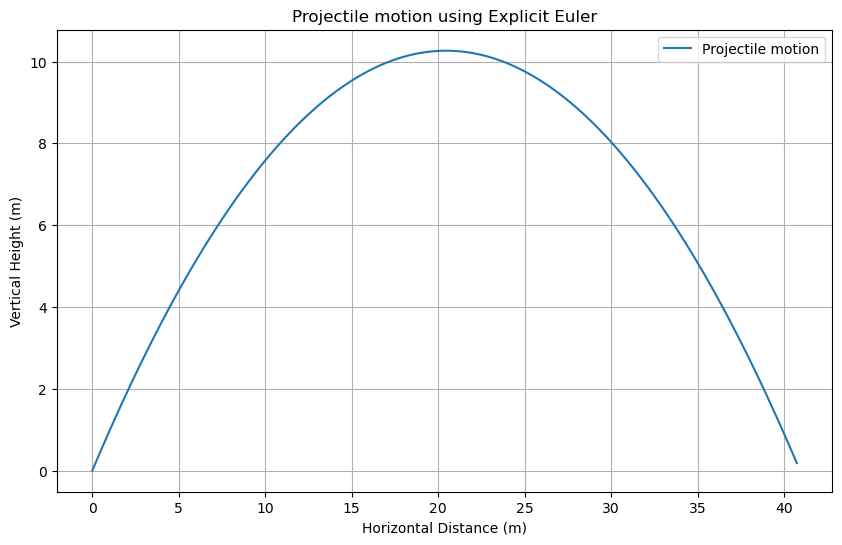

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(y0, v0, dt, T, g=9.81):
    n = int(T/dt)+1
    y = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)

    y[0] = y0
    v[0] = v0

    for i in range(n-1):
        y[i+1] = y[i] + dt * v[i]
        v[i+1] = v[i] - dt * g  # subtracting because g is acting downwards

        t[i+1] = t[i] + dt

    return y, v, t

# Given parameters
theta = np.pi / 4  # 45 degrees
v0 = 20  # m/s initial speed
y0 = 0  # initial height
T = 2 * v0 * np.sin(theta) / 9.81  # total time for projectile to reach the ground
dt = 0.01  # time step

y, v, t = explicit_euler(y0, v0*np.sin(theta), dt, T)

# Compute the horizontal motion (uniform)
x = v0 * np.cos(theta) * t

# Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Projectile motion')
plt.title('Projectile motion using Explicit Euler')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid(True)
plt.show()


## Projectile Motion using 4th Order Runge-Kutta Method

The Runge Kutta method takes a sampling of four slopes through an interval and takes a weighted average to estimate the right end point.

![Runge Kutta](runge_kutta.gif)

Let's solve the equations of motion for a projectile using the 4th order Runge-Kutta method. Since the horizontal motion is uniform and can be directly integrated, we'll focus on the vertical motion.

### Equations for Vertical Motion

The equation for the vertical motion under gravity, neglecting air resistance, is given by:
$$ \frac{d^2y}{dt^2} = -g $$

To solve it using the Runge-Kutta method, we'll convert this second-order ODE into two first-order ODEs:

1. $ \frac{dy}{dt} = v $
2. $ \frac{dv}{dt} = -g $

### Implementing the 4th Order Runge-Kutta Method

Given the following initial conditions:
- Initial height: $ y_0 = 0 $ (assuming it's launched from the ground)
- Initial vertical velocity: $ v_0 = v_0 \sin(\theta) $
- Time step: $ \Delta t $

We can describe the 4th order Runge-Kutta method as:

* $ k_1 = \Delta t \cdot f(t, y) $

* $ k_2 = \Delta t \cdot f(t + 0.5\Delta t, y + 0.5k_1) $

* $ k_3 = \Delta t \cdot f(t + 0.5\Delta t, y + 0.5k_2) $

* $ k_4 = \Delta t \cdot f(t + \Delta t, y + k_3) $

Then, the new value of y is: $y_{new} = y + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

#### Applying to our System

For the first equation, $ \frac{dy}{dt} = v $:

* $ k_{1y} = \Delta t \cdot v $

* $ k_{2y} = \Delta t \cdot (v + 0.5\Delta t \cdot (-g)) $

* $ k_{3y} = \Delta t \cdot (v + 0.5\Delta t \cdot (-g)) $
  (Same as $k_{2y}$ because acceleration due to gravity is constant)

* $ k_{4y} = \Delta t \cdot (v + \Delta t \cdot (-g)) $

Subsequently, $y_{new} = y + \frac{1}{6}(k_{1y} + 2k_{2y} + 2k_{3y} + k_{4y})$

For the second equation, $ \frac{dv}{dt} = -g $:

* $ k_{1v} = \Delta t \cdot (-g) $

* $ k_{2v} = \Delta t \cdot (-g) $ (Constant due to gravity)

* $ k_{3v} = \Delta t \cdot (-g) $ (Constant due to gravity)

* $ k_{4v} = \Delta t \cdot (-g) $ (Constant due to gravity)

And then, $ v_{new} = v + \frac{1}{6}(k_{1v} + 2k_{2v} + 2k_{3v} + k_{4v}) $

By iterating over these steps for each time step, we can compute the projectile's vertical position and velocity over time.

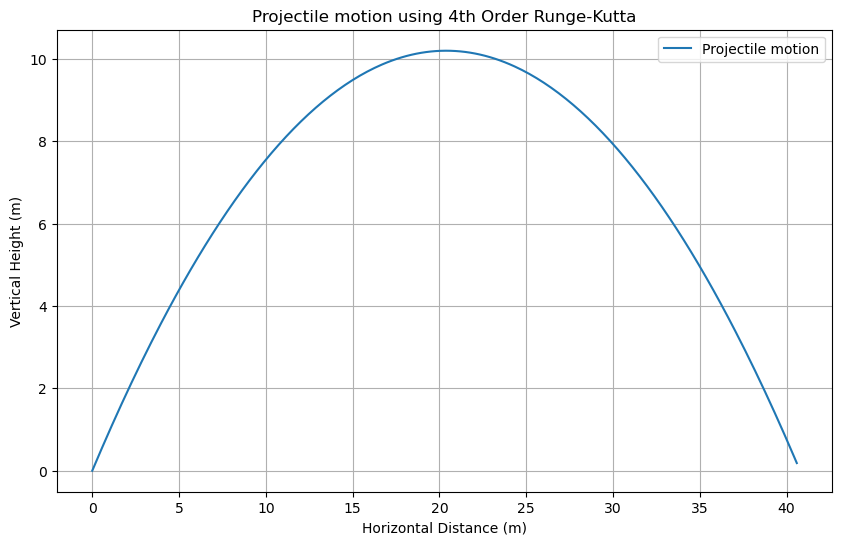

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4th_order(y0, v0, dt, T, g=9.81):
    n = int(T/dt)
    y = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)

    y[0] = y0
    v[0] = v0

    for i in range(n-1):
        k1y = dt * v[i]
        k2y = dt * (v[i] + 0.5*dt*(-g))
        k3y = dt * (v[i] + 0.5*dt*(-g))
        k4y = dt * (v[i] + dt*(-g))

        y[i+1] = y[i] + (1/6)*(k1y + 2*k2y + 2*k3y + k4y)

        k1v = dt * (-g)
        k2v = dt * (-g)
        k3v = dt * (-g)
        k4v = dt * (-g)

        v[i+1] = v[i] + (1/6)*(k1v + 2*k2v + 2*k3v + k4v)

        t[i+1] = t[i] + dt

    return y, v, t

# Given parameters
theta = np.pi / 4  # 45 degrees
v0 = 20  # m/s initial speed
y0 = 0  # initial height
T = 2 * v0 * np.sin(theta) / 9.81  # total time for projectile to reach the ground
dt = 0.01  # time step

y, v, t = runge_kutta_4th_order(y0, v0*np.sin(theta), dt, T)

# Compute the horizontal motion (uniform)
x = v0 * np.cos(theta) * t

# Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Projectile motion')
plt.title('Projectile motion using 4th Order Runge-Kutta')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid(True)
plt.show()



## Physics-Informed Neural Network of Projectile Motion

Physics-Informed Neural Networks (PINNs) are a class of neural networks that incorporate physical principles (usually in the form of differential equations) into the learning process. By doing so, PINNs can leverage both data and known physics to make predictions, which can be especially useful when data is sparse.

### Basic Idea

Given an ordinary differential equation (ODE) of the form:
$$ \frac{dy}{dt} = f(t, y) $$
a PINN aims to train a neural network model to satisfy this ODE while also fitting any available data.

### PINN Loss Function

The loss function for a PINN typically consists of two parts:
1. A term that ensures the neural network's output satisfies the given ODE.
2. A term that ensures the neural network's output matches any given initial or boundary conditions.

For the provided code, which seems to be modeling the motion of a projectile under gravity, the loss function can be described as follows:

### Physics-based Loss

The second derivative of the predicted trajectory with respect to time, $ \frac{d^2y}{dt^2} $, should be equal to the negative acceleration due to gravity, $ -g $. The discrepancy between these values forms the physics-based loss:
$$ \text{loss\_physics} = \text{mean}\left( \left( \frac{d^2y_{\text{pred}}}{dt^2} + g \right)^2 \right) $$

### Initial Condition Loss

The predicted trajectory should also satisfy the given initial conditions for position, $ y_{\text{initial}} $, and velocity, $ v_{\text{initial}} $. The discrepancy between the predicted and given initial conditions forms the initial condition loss:
$$ \text{loss\_initial} = \left( y_{\text{pred}}(t_0) - y_{\text{initial}} \right)^2 + \left( \frac{dy_{\text{pred}}}{dt}(t_0) - v_{\text{initial}} \right)^2 $$

### Total Loss

The total loss is the sum of the physics-based loss and the initial condition loss:
$$ \text{loss} = \text{loss\_physics} + \text{loss\_initial} $$

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Define the neural network model
class PINNOde(nn.Module):
    def __init__(self):
        super(PINNOde, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.fc(x)

    # Create a PINN loss function
    def pinn_loss(self, t, y_initial, v_initial, g=9.81):
        y_pred = self.forward(t)

        # Calculate dy/dt using auto differentiation
        dy_dt = torch.autograd.grad(y_pred.sum(), t, create_graph=True)[0]

        # Calculate d^2y/dt^2 using auto differentiation
        d2y_dt2 = torch.autograd.grad(dy_dt.sum(), t, create_graph=True)[0]

        # Loss based on the physics (gravity)
        loss_physics = torch.mean((d2y_dt2 + g)**2)

        # Loss based on the initial conditions
        loss_initial = (y_pred[0] - y_initial)**2 + (dy_dt[0] - v_initial)**2

        return loss_physics + loss_initial


# Training data (only time, since we'll use PINNs)
theta = np.pi / 4
v0 = 20.0
T = 2 * v0 * np.sin(theta) / 9.81
t_train = torch.linspace(0, T, 100).reshape(-1, 1).float().requires_grad_(True)
y_initial = torch.tensor([0.0])
v_initial = torch.tensor([v0 * np.sin(theta)])

# Initialize and train the model
model = PINNOde()
optimizer = optim.Adam(model.parameters(), lr=0.01)
for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    loss = model.pinn_loss(t_train, y_initial, v_initial)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Predict using the trained model
t_test = torch.linspace(0, T, 200).reshape(-1, 1).float()
y_pred = model(t_test).detach().numpy()

  0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 0, Loss: 301.38002961248515
Epoch 1000, Loss: 22.789170023322924
Epoch 2000, Loss: 2.3283386330394036
Epoch 3000, Loss: 0.21583355054284348
Epoch 4000, Loss: 0.028680545891298544


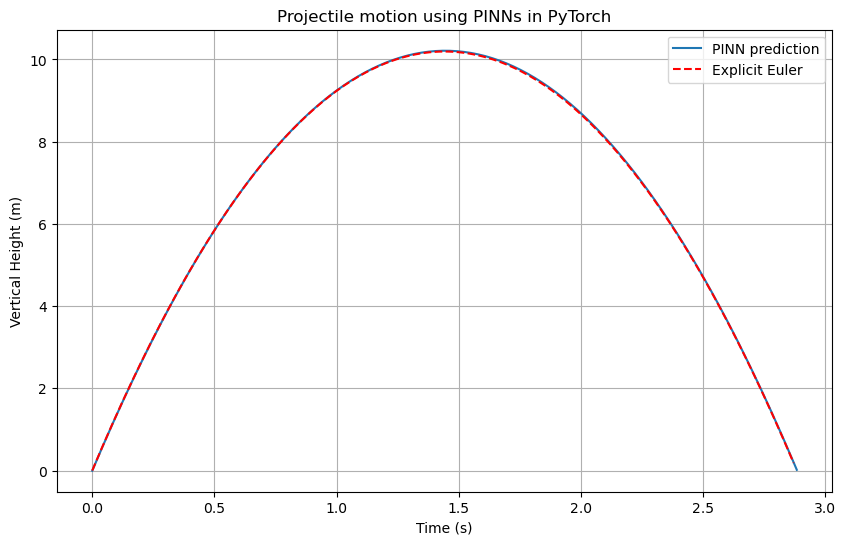

In [8]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(t_test, y_pred, label='PINN prediction')
plt.plot(t, y, 'r--', label='Explicit Euler')
plt.title('Projectile motion using PINNs in PyTorch')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid(True)
plt.show()